# Machine Learning with Python

These materials will provide a practical introduction to commonly used machine learning techniques, using data from a real research project into honeybee behaviour that was solved with machine learning.

![](images/entrance.jpg)

## Classifying Honeybee Tags

The data explored during this workshop come from a research project where honeybees were tagged with reflective markers and filmed using an infrared light for 24 hours a day for over two weeks. Three different types of tag were used:

Tag Number             |  Pattern   | Details
:-------------------------:|:-------------------------: | :-------------------------:|
1  |  Rectangle | 100 bees that were not exposed to any drugs:
2  |  Circle    | 100 bees that were treated with caffeine:
3  | Blank      | Single queen in the colony received this tag:

This is what the tags looked like before we added them to the colony:

Control Tags             |  Treatment Tags
:-------------------------:|:-------------------------:
![control tags](images/tag1.jpg)  |  ![Treatment Tags](images/tag2.jpg)

Queen Tag             |
:-------------------------:|
![](images/queen.jpg)  |

This is how the tags appeared in the video we filmed over the course of the experiment

Experiment Footage             |
:-------------------------:|
![](images/beehive.png)  |

We're interested in distinguishing the three tagged groups of bees in the footage from this experiment. There is far too many videos and bees to be able to do this ourselves, so we'll try to train a machine learning algorithm to perform this classification task for us.

## Libraries

We'll be using the following Python libraries throught this workshop:

* scikit-learn: Machine learning library
* OpenCV: Image processing library
* NumPy: Matrix manipulation library
* Matplotlib: For generating figures and plots

## Getting Started

Let's load the libraries so that we can use them.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

## Extract Images

Included in these workshop materials is a compressed file ("data.tar.gz") containg the images that we'll be classifying today. Once you extract this file, you should have a directory called "data" which contains the following directories:

Directory            |  Contents
:-------------------------:|:-------------------------:
I | Contains rectangle tag images
O    | Contains circle tag images
Q      | Contains blank tag images

Feel free to have a look through these directories, and we'll show you how to load these images into Python using OpenCV next.

## Reading Images

We're now going to be using OpenCV's "imread" command to load one of the images from each type of tag into Python and then use Matplotlib to plot the images:

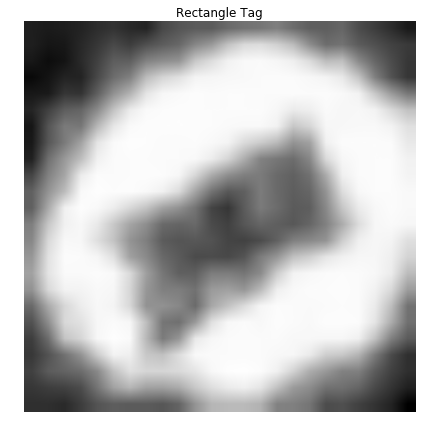

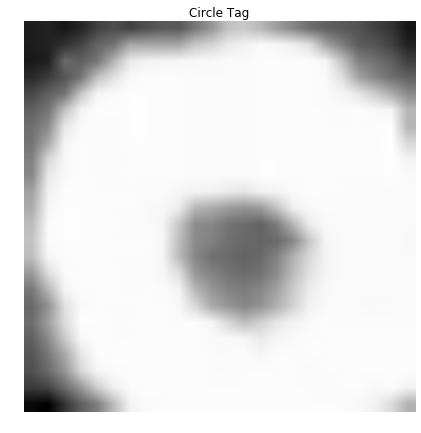

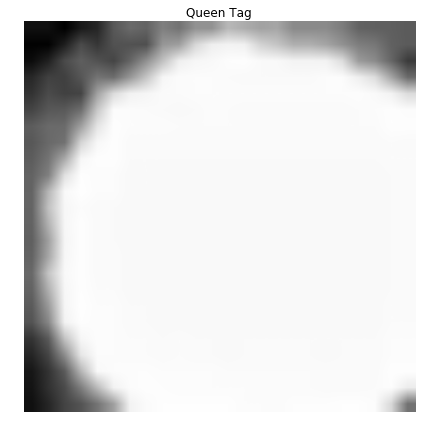

In [6]:
rect_image =    cv2.imread('data/I/27.png', cv2.IMREAD_GRAYSCALE)
circle_image =  cv2.imread('data/O/11527.png', cv2.IMREAD_GRAYSCALE)
queen_image =   cv2.imread('data/Q/18027.png', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize = (10, 7))
plt.title('Rectangle Tag')
plt.axis('off')
plt.imshow(rect_image,  cmap = cm.Greys_r)

plt.figure(figsize = (10, 7))
plt.title('Circle Tag')
plt.axis('off')
plt.imshow(circle_image,  cmap = cm.Greys_r)

plt.figure(figsize = (10, 7))
plt.title('Queen Tag')
plt.axis('off')
plt.imshow(queen_image,  cmap = cm.Greys_r)

## Image Properties

One of the really useful things about using OpenCV to manipulate images in Python is that all images are treated as NumPy matrices. This means we can use NumPy's functions to manipulate and understand the data we're working with. To demonstrate this, we'll use use NumPy's "shape" and "dtype" commands to take a closer look at the rectangular tag image we just read in:

In [8]:
print (rect_image.shape)
print (rect_image.dtype)

(24, 24)
uint8


This tells us that this image is 24x24 pixels in size, and that the datatype of the values it stores are unsigned 8 bit integers. While the explanation of this datatype isn't especially relevant to the lesson, the main point is that it is extremely important to double check the size and structure of your data. Let's do the same thing for the circular tag image too:

In [9]:
print (circle_image.shape)
print (circle_image.dtype)

(24, 24)
uint8


This holds the same values, which is good. When you're working with your own datasets in the future, it would be highly beneficial to write your own little program to check the values and structure of your data to ensure that subtle bugs don't creep in to your analysis.

## Feature Engineering

When people think of machine learning, the first thing that comes to mind tends to be the fancy algorithms that will train the computer to solve your problem. Of course this is important, but the reality of the matter is that the way you process the data you'll eventually feed into the machine learning algorithm is often the thing you'll spend the most time doing and will have the biggest effect on the accuracy of your results.

Now, when most people think of features in data, they think that this is what it is:

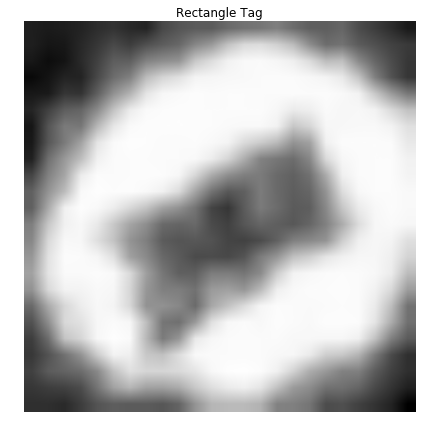

In [10]:
plt.figure(figsize = (10, 7))
plt.title('Rectangle Tag')
plt.axis('off')
plt.imshow(rect_image,  cmap = cm.Greys_r)

In fact this is not actualy the case. In the case of this dataset, the features are actually the pixel values that make up the images - those are the values we'll be training the machine learning algorithm with:

In [13]:
print(rect_image)

[[ 42  40  42  46  53  56  50  46  70  79  84  84  97 104 108 115 100  88
   87  94  73  63  53  38]
 [ 43  36  37  49  59  71  63  75  86  95 121 137 168 193 196 184 162 128
  100 105  85  75  66  61]
 [ 37  29  35  51  65  87  88 118 127 132 174 197 225 238 240 231 219 195
  162 165 123  94  73  59]
 [ 26  35  46  46  71 100 117 162 187 202 228 232 236 238 242 243 241 236
  229 212 170 116  77  58]
 [ 37  39  58  56  89 130 156 207 233 240 245 242 244 244 241 241 244 241
  244 238 227 175 138 110]
 [ 47  65  87  93 125 169 215 240 243 245 244 243 244 244 243 233 214 220
  240 234 236 227 193 166]
 [ 36  79 111 109 159 209 240 246 246 245 245 244 240 239 239 225 173 188
  234 236 238 239 227 200]
 [ 38  81 111 143 207 240 247 245 242 242 244 238 228 194 178 160 132 142
  222 244 243 244 242 212]
 [ 45 102 136 164 223 242 244 244 242 241 239 217 187 151 118 109 100 121
  193 235 241 244 244 224]
 [ 68 118 146 215 243 242 244 245 243 234 189 149 128 115 111  97  90 103
  149 221 241 243

So what can we do to manipulate the features in out dataset to improve our results? We'll explore three methods to acheive this:

1. Image smoothing
2. Modifying brightness
3. Modifying contrast

Techniques like image smoothing can be useful when improving the features you train the machine learning algorithm on as you can eliminate some of the potential noise in the image that could confuse the program.

## Smoothing

Image smoothing is another name for blurring the image. It involves passing a rectangular box (called a kernel) over the image and modifying pixels in the image based on the surrounding values.

As part of this exercise, we'll explore 3 different smoothing techniques:

Smoothing Method            |  Explanation
:-------------------------:|:-------------------------:
Mean | Replaces pixel with the mean value of the surrounding pixels
Median    | Replaces pixel with the median value of the surrounding pixels
Gaussian      | Replaces pixel by placing different weightings on surrrounding pixels according to the gaussian distribution

In [ ]:
mean_smoothed = cv2.blur(rect_image, (5, 5))
median_smoothed = cv2.medianBlur(rect_image, 5)
gaussian_smoothed = cv2.GaussianBlur(rect_image, (5, 5), 0)

Feel free to have a play with the different parameters for these smoothing operations. We'll now write some code to place the original images next to their smoothed counterparts in order to compare them:

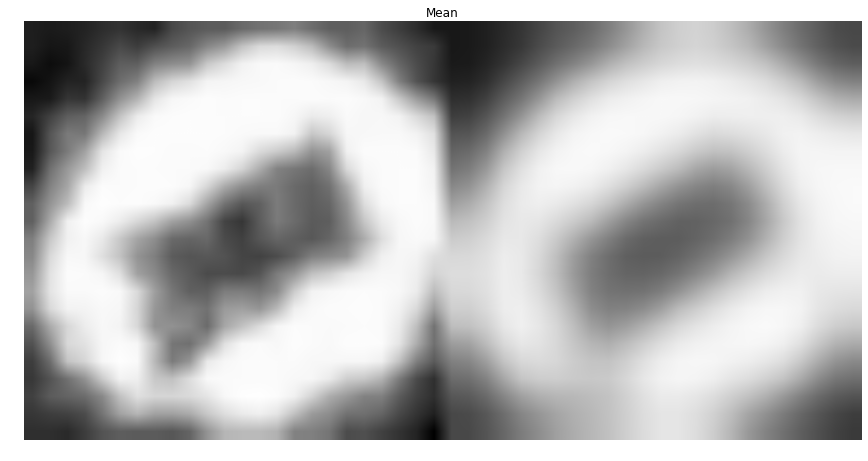

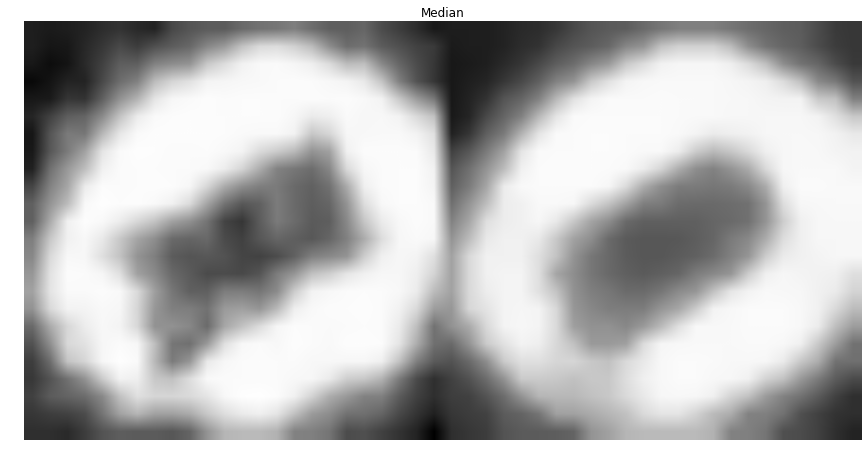

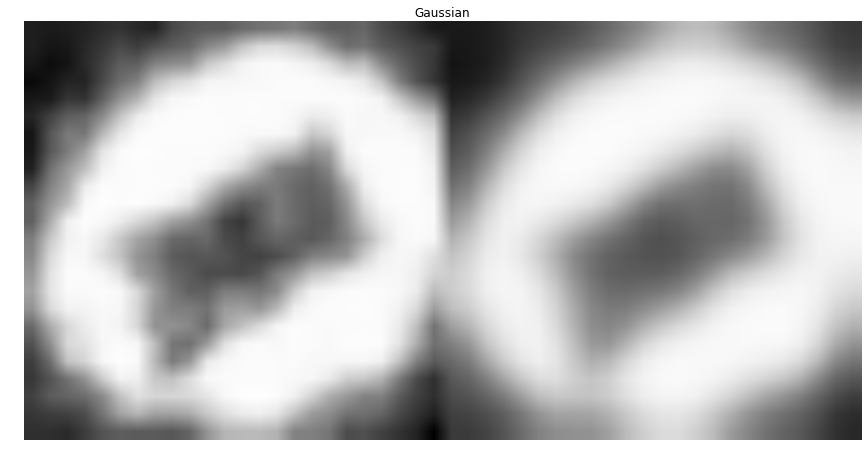

In [17]:
mean_compare = np.hstack((rect_image, mean_smoothed))
median_compare = np.hstack((rect_image, median_smoothed))
gaussian_compare = np.hstack((rect_image, gaussian_smoothed))

plt.figure(figsize = (15, 12))
plt.title('Mean')
plt.axis('off')
plt.imshow(mean_compare, cmap = cm.Greys_r) 

plt.figure(figsize = (15, 12))
plt.title('Median')
plt.axis('off')
plt.imshow(median_compare, cmap = cm.Greys_r)

plt.figure(figsize = (15, 12))
plt.title('Gaussian')
plt.axis('off')
plt.imshow(gaussian_compare, cmap = cm.Greys_r)

## Brightness and Contrast

Modifying the brightness and contrast of our images is a surprisingly simple task: to increase/decrease the brightness, you just have to add/subtract from every pixel value in the image, while to increase the contrast, you can multiply the pixel values by a number larger than one or to decrease the contrast you multiple the pixel values by a floating point number less than one. Let's see how this works:

In [ ]:
increase_contrast = rect_image * 3
decrease_contrast = rect_image * 0.5
increase_brightness = rect_image + 30
decrease_brightness = rect_image - 30

plt.figure(figsize = (10, 7))
plt.title('HeLa Cells')
plt.axis('off')
plt.imshow(decrease_contrast)

## Visualising Data

Important to visualise, etc

## Clustering - PCA, K means, supervised clustering - LDA

## Splitting Training/Test Data

## SVM Classification

Include pic of SVM theory.

## Code from notebook talk:

In [ ]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import glob
%matplotlib inline

def read_gray_img(img_loc):
    image = cv2.imread(img_loc, 0)
    return image

def flatten_image(roi):
    flat_roi = roi.flatten()
    return flat_roi

In [ ]:
tags = []
classify = []

tags.extend(glob.glob('I/*.png'))
classify.extend(len(glob.glob('I/*.png')) * [1])
tags.extend(glob.glob('O/*.png'))
classify.extend(len(glob.glob('O/*.png')) * [2])
tags.extend(glob.glob('Q/*.png'))
classify.extend(len(glob.glob('Q/*.png')) * [3])

plt.figure()
plt.imshow(read_tags[0], cmap = cm.Greys_r)
plt.figure()
plt.imshow(read_tags[108], cmap = cm.Greys_r)
plt.figure()
plt.imshow(read_tags[211], cmap = cm.Greys_r)

In [ ]:
tag_flat = list(map(flatten_image, read_tags))
X = np.array(tag_flat)
print(X.shape)
y = np.array(classify)
print(y.shape)

In [ ]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=4)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.lda import LDA

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
plt.figure(figsize = (35, 20))
plt.scatter(X_r[:, 0], X_r[:, 1], c=y, s=200)

lda = LDA(n_components=2)
lda = lda.fit(X_train, y_train)
X_lda = lda.transform(X_train)
Z = lda.transform(X_test)
plt.figure(figsize = (35, 20))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y_train, s=200)

In [ ]:
from sklearn import svm
from sklearn import metrics

clf = svm.SVC(gamma=0.001, C=10)
clf.fit(X_lda, y_train)
y_pred = clf.predict(Z)

print metrics.accuracy_score(y_test, y_pred)